In [3392]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output
import ipywidgets as widgets
import IPython.display
from IPython.display import display, clear_output

import pandas as pd
import numpy as np
import math

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [3393]:
data=pd.read_csv("cars_engage_2022.csv")

In [3394]:
data=data[['Make','Model','Variant','Ex-Showroom_Price','Cylinders','Fuel_Type','Fuel_Tank_Capacity','Height','Length','Width','ARAI_Certified_Mileage','ARAI_Certified_Mileage_for_CNG','Power','Basic_Warranty','Gear_Indicator']]

In [3395]:
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].str.replace(',', '')
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].str.replace('Rs.', '')
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].astype(int)
data['Fuel_Tank_Capacity'] = data['Fuel_Tank_Capacity'].str.replace('litres', '')
data['Fuel_Tank_Capacity'] = data['Fuel_Tank_Capacity'].astype(float)
data['Height'] = data['Height'].str.replace('mm', '')
data['Height'] = data['Height'].astype(float)
data['Length'] = data['Length'].str.replace('mm', '')
data['Length'] = data['Length'].astype(float)
data['Width'] = data['Width'].str.replace('mm', '')
data['Width'] = data['Width'].astype(float)

In [3396]:
data.dropna(subset=['Cylinders'],inplace=True)
data.dropna(subset=['Ex-Showroom_Price'],inplace=True)
data.dropna(subset=['Fuel_Tank_Capacity'],inplace=True)
data.dropna(subset=['Height'],inplace=True)
data.dropna(subset=['Length'],inplace=True)
data.dropna(subset=['Width'],inplace=True)
data

,Make,Model,Variant,Ex-Showroom_Price,Cylinders,Fuel_Type,Fuel_Tank_Capacity,Height,Length,Width,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Power,Basic_Warranty,Gear_Indicator
0,Tata,Nano Genx,Xt,292667,2.0,Petrol,24.0,1652.0,3164.0,1750.0,23.6 km/litre,NaN,38PS@5500rpm,2 years /75000 Kms (years/distance whichever c...,NaN
1,Tata,Nano Genx,Xe,236447,2.0,Petrol,24.0,1652.0,3164.0,1750.0,23.6 km/litre,NaN,38PS@5500rpm,2 years /75000 Kms (years/distance whichever c...,NaN
2,Tata,Nano Genx,Emax Xm,296661,2.0,CNG,15.0,1652.0,3164.0,1750.0,NaN,36 km/kg,38PS@5500rpm,2 years /75000 Kms (years/distance whichever c...,NaN
3,Tata,Nano Genx,Xta,334768,2.0,Petrol,24.0,1652.0,3164.0,1750.0,21.9 km/litre,NaN,38PS@5500rpm,2 years /75000 Kms (years/distance whichever c...,Yes
4,Tata,Nano Genx,Xm,272223,2.0,Petrol,24.0,1652.0,3164.0,1750.0,23.6 km/litre,NaN,38PS@5500rpm,2 years /75000 Kms (years/distance whichever c...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1302000,4.0,Diesel,40.0,1495.0,4440.0,1695.0,25.1 km/litre,NaN,100PS@3600rpm,"2 Years / 40,000 Kms (Whichever comes earlier)",NaN
1272,Honda,City,Zx Mt Diesel,1421000,4.0,Diesel,40.0,1495.0,4440.0,1695.0,25.1 km/litre,NaN,100PS@3600rpm,"2 Years / 40,000 Kms (Whichever comes earlier)",NaN
1273,Honda,City,Zx Cvt Petrol,1431000,4.0,Petrol,40.0,1495.0,4440.0,1695.0,22.6 km/litre,NaN,119PS@6600rpm,"2 Years / 40,000 Kms (Whichever comes earlier)",NaN
1274,Honda,City,V Cvt Petrol,1201000,4.0,Petrol,40.0,1495.0,4440.0,1695.0,17.8 km/litre,NaN,119PS@6600rpm,"2 Years / 40,000 Kms (Whichever comes earlier)",NaN


In [3397]:
data2 = data.copy()

In [3398]:
data3 = data.copy()

<h2>Selecting cars on the basis of priority of multiple features</h2>



In [3399]:
sum1=0
sum2=0
sum3=0
sum4=0
sum5=0
sum6=0
for ind in data.index:
    sum1=sum1+((data['Cylinders'][ind])*(data['Cylinders'][ind]))
    sum2=sum2+((data['Ex-Showroom_Price'][ind])*(data['Ex-Showroom_Price'][ind]))
    sum3=sum3+((data['Fuel_Tank_Capacity'][ind])*(data['Fuel_Tank_Capacity'][ind]))
    sum4=sum4+((data['Height'][ind])*(data['Height'][ind]))
    sum5=sum5+((data['Length'][ind])*(data['Length'][ind]))
    sum6=sum6+((data['Width'][ind])*(data['Width'][ind]))
print(sum1,sum2,sum3,sum4,sum5,sum6)

24396.0 243956823 3440184.81 2896850328.404025 21244791322.529602 3658852365.404025


In [3400]:
def min_max(*arguments):
    
    data['Cylinders_normalized']=pd.Series() 
    data['Ex-Showroom_Price_normalized']=pd.Series() 
    data['Fuel_Tank_Capacity_normalized']=pd.Series() 
    data['Height_normalized']=pd.Series() 
    data['Width_normalized']=pd.Series() 
    data['Length_normalized']=pd.Series() 
    if cyl=="minimum":
        print("yes")
    for ind in data.index:
        if cyl=="maximum":
            data['Cylinders_normalized'][ind]=data['Cylinders'][ind]/sum1
        else:
            data['Cylinders_normalized'][ind]=1-data['Cylinders'][ind]/sum1
            
        if price=="maximum":
            data['Ex-Showroom_Price_normalized'][ind]=data['Ex-Showroom_Price'][ind]/sum2
        else:
            data['Ex-Showroom_Price_normalized'][ind]=1-data['Ex-Showroom_Price'][ind]/sum2
            
        if fuel=="maximum":
            data['Fuel_Tank_Capacity_normalized'][ind]=data['Fuel_Tank_Capacity'][ind]/sum3
        else:
            data['Fuel_Tank_Capacity_normalized'][ind]=1-data['Fuel_Tank_Capacity'][ind]/sum3
       
        if height=="maximum":
            data['Height_normalized'][ind]=data['Height'][ind]/sum4
        else:
            data['Height_normalized'][ind]=1-data['Height'][ind]/sum4
        
        if width=="maximum":
            data['Width_normalized'][ind]=data['Width'][ind]/sum5
        else:
            data['Width_normalized'][ind]=1-data['Width'][ind]/sum5
        
        if length=="maximum":
            data['Length_normalized'][ind]=data['Length'][ind]/sum6
        else:
            data['Length_normalized'][ind]=1-data['Length'][ind]/sum6

            
        data['sum']=0.2*data['Cylinders_normalized']+0.3*data['Ex-Showroom_Price_normalized']+0.2*data['Fuel_Tank_Capacity_normalized']+0.1*data['Height_normalized']+0.1*data['Length_normalized']+0.1*data['Width_normalized']
        
        data.sort_values(by="sum",ascending=False)

<h2> Predict the price of car with all desired features </h2>

In [3401]:
le=preprocessing.LabelEncoder()
data2['Make']=le.fit_transform(data2['Make']).astype(int)
data2['Model']=le.fit_transform(data2['Model']).astype(int)
data2['Variant']=le.fit_transform(data2['Variant']).astype(int)
data2['Fuel_Type']=le.fit_transform(data2['Fuel_Type']).astype(int)
data2['ARAI_Certified_Mileage']=le.fit_transform(data2['ARAI_Certified_Mileage']).astype(int)
data2['ARAI_Certified_Mileage_for_CNG']=le.fit_transform(data2['ARAI_Certified_Mileage_for_CNG']).astype(int)
data2['Power']=le.fit_transform(data2['Power']).astype(int)
data2['Basic_Warranty']=le.fit_transform(data2['Basic_Warranty']).astype(int)
data2['Gear_Indicator']=le.fit_transform(data2['Gear_Indicator']).astype(int)


In [3402]:
y = data2['Ex-Showroom_Price']
data2.drop(['Ex-Showroom_Price'],axis=1,inplace=True)
X = pd.DataFrame(data2, columns=data2.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [3403]:
X_train

,Make,Model,Variant,Cylinders,Fuel_Type,Fuel_Tank_Capacity,Height,Length,Width,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Power,Basic_Warranty,Gear_Indicator
1167,13,70,191,6.0,4,63.0,1308.0,4482.0,1923.0,271,12,162,15,0
708,32,93,779,4.0,2,55.0,1795.0,4735.0,1830.0,71,12,59,15,1
858,23,78,723,8.0,4,75.0,1353.0,4881.0,2056.0,269,12,196,25,0
81,28,168,502,4.0,4,46.0,1730.0,3970.0,1570.0,84,12,285,25,1
537,20,32,623,4.0,2,60.0,1977.0,4440.0,1660.0,83,12,250,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,31,234,877,4.0,2,44.0,1570.0,3995.0,1706.0,203,12,284,11,0
521,31,141,914,4.0,2,44.0,1607.0,3994.0,1811.0,217,12,17,25,0
49,11,183,589,4.0,4,35.0,1560.0,3610.0,1645.0,167,12,268,25,0
304,3,109,394,6.0,4,52.0,1410.0,4461.0,1854.0,270,12,191,7,0


In [3404]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [3405]:
rf.feature_importances_

array([1.02399525e-02, 1.68114767e-02, 7.57994571e-03, 6.96248534e-01,
       1.98329233e-04, 2.54050687e-02, 1.97288085e-02, 3.93747766e-02,
       7.93167037e-02, 6.16789701e-03, 7.53838295e-06, 9.56340256e-02,
       2.78074710e-03, 5.06196177e-04])

<BarContainer object of 14 artists>

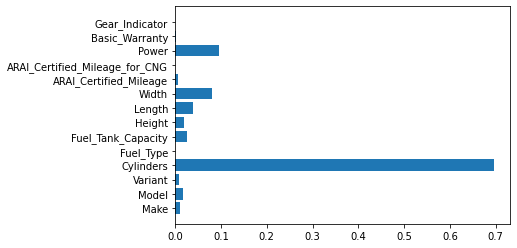

In [3406]:
plt.barh(data2.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

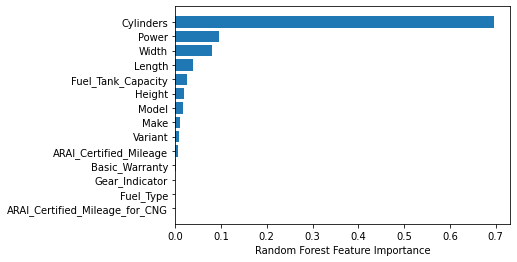

In [3407]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(data2.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [3408]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

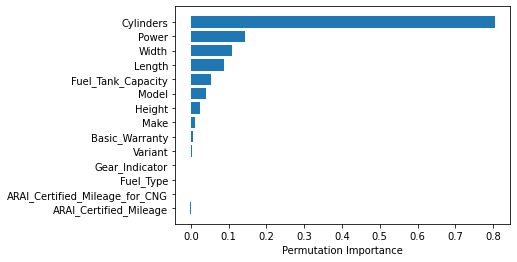

In [3409]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(data2.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [3410]:
y_pred_test = rf.predict(X_test)

In [3411]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

# find best model score
gs_knn.score(X_train, y_train)


1.0

<h2> Web Application </h2>

In [3412]:
text_0 = widgets.HTML(value="<h1>CUSTOMER SECTION</h1>")
text_1 = widgets.HTML(value="<h3>Cars Preferred by a Customer:</h3>")

In [3413]:
text_2=widgets.HTML(value="<h4>Ex-Showroom Price</h4>")
price = widgets.ToggleButtons(
            options=['minimum', 'maximum']
        )
text_3=widgets.HTML(value="<h4>Cylinders</h4>")
cyl = widgets.ToggleButtons(
            options=['minimum', 'maximum']
        )
text_4=widgets.HTML(value="<h4>Fuel Tank Capacity</h4>")
fuel = widgets.ToggleButtons(
            options=['minimum', 'maximum']
        )
text_5=widgets.HTML(value="<h4>Height</h4>")
height = widgets.ToggleButtons(
            options=['minimum', 'maximum']
        )
text_6=widgets.HTML(value="<h4>Width</h4>")
width = widgets.ToggleButtons(
            options=['minimum', 'maximum']
        )
text_7=widgets.HTML(value="<h4>Length</h4>")
length = widgets.ToggleButtons(
            options=['minimum', 'maximum']
        )

min_max(price.value,cyl.value,fuel.value,height.value,width.value,length.value)


In [3414]:
button_send = widgets.Button(
                description='Generate Cars Dataset',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()
from pivottablejs import pivot_ui

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
from IPython.core.display import HTML


def on_button_clicked(event):
    
            df = pd.DataFrame(data.sort_values(by="sum",ascending=False))
            df_temp=df.iloc[:5]
            display(HTML(df_temp.to_html()))
    
button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send])

In [3415]:
text_9 = widgets.HTML(value="<h4>Enter the model of the car:</h4>")

model = widgets.Text(placeholder='model')

input_widget0 = widgets.HBox([model])

In [3416]:
text_10 = widgets.HTML(value="<h4>Enter the variant:</h4>")

variantt = widgets.Text(placeholder='variant')

input_widget1 = widgets.HBox([variantt])

In [3417]:
text_11 = widgets.HTML(value="<h4>Choose the number of cylinders:</h4>")

cylinders = widgets.IntSlider(
            value=3,
            min=2, 
            max=16,
            step=1,
            style={'description_width': 'initial', 'handle_color': '#a01659'} 
        )

input_widget2 = widgets.HBox([cylinders])

In [3418]:
text_12 = widgets.HTML(value="<h4>Choose the Fuel type:</h4>")

fueltype= widgets.Dropdown(
          options=['CNG', 'CNG+Petrol', 'Diesel','Electric','Hybrid','Petrol']
           )

input_widgets1 = widgets.HBox([fueltype])

In [3419]:
text_13 = widgets.HTML(value="<h4>Enter the capacity of the fuel tank(litres):</h4>")

fuelcapacity = widgets.Text(placeholder='capacity')

input_widget4 = widgets.HBox([fuelcapacity])

In [3420]:
text_14 = widgets.HTML(value="<h4>Enter the height of the vehicle(mm):</h4>")

cheight = widgets.Text(placeholder='height')

input_widget5 = widgets.HBox([cheight])

In [3421]:
text_15 = widgets.HTML(value="<h4>Enter the length of the vehicle(mm):</h4>")

clength = widgets.Text(placeholder='length')

input_widget6 = widgets.HBox([clength])

In [3422]:
text_16 = widgets.HTML(value="<h4>Enter the width of the vehicle(mm):</h4>")

cwidth = widgets.Text(placeholder='width')

input_widget7 = widgets.HBox([cwidth])

In [3423]:
text_17 = widgets.HTML(value="<h4>Enter the ARAI Certified Mileage(km/litre):</h4>")

mileage = widgets.Text(placeholder='mileage')

input_widget8 = widgets.HBox([mileage])

In [3424]:
text_18 = widgets.HTML(value="<h4>Enter the ARAI Certified Mileage for CNG(km/kg):</h4>")

mileagecng = widgets.Text(placeholder='mileage')

input_widget9 = widgets.HBox([mileagecng])

In [3425]:
text_19 = widgets.HTML(value="<h4>Enter the Power of the vehicle required(rpm):</h4>")

power = widgets.Text(placeholder='power')

input_widget10 = widgets.HBox([power])

In [3426]:
text_20 = widgets.HTML(value="<h4>Enter the Basic Warranty required for vehicle:</h4>")

basicwarranty = widgets.Text(placeholder='warranty')

input_widget11 = widgets.HBox([basicwarranty])

In [3427]:
text_21 = widgets.HTML(value="<h4>Is Gear Indicator present:</h4>")

gearindicator = widgets.RadioButtons(
                options=['Yes', 'No'],
                    disabled=False
                )

input_widget12 = widgets.HBox([gearindicator])

In [3428]:
button_send2 = widgets.Button(
                description='Predicted Price(Rs)',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

out = widgets.Output()

def on_button_clicked2(button_send2):
   
            if (company.value=="Tata"):
                companyy=1
            else:
                companyy=0
            
            if (model.value=="Nano Genx"):
                modell=1
            else:
                modell=0
                
            if (variantt.value=="Xt"):
                varianttt=1
            else:
                varianttt=0
                
            if (fueltype.value=="Petrol"):
                fueltypee=1 
            else: 
                fueltypee=0
                
            if (power.value=="38PS@5500rpm"):
                powerr=1
            else:
                powerr=0
                
                
            if (basicwarranty.value=="1 year"):
                basicwarrantyy=1
            else:
                basicwarrantyy=0
                
                
            if (gearindicator.value=="yes"):
                gearindicatorr=1
            else:
                gearindicatorr=0
                
            l = [[companyy, modell, varianttt, cylinders.value, fueltypee, fuelcapacity.value, cheight.value, clength.value, cwidth.value, mileage.value, mileagecng.value, powerr, basicwarrantyy, gearindicatorr]]

            ae= pd.DataFrame(l, columns=X_train.columns)

            y_pred_test = rf.predict(ae)
            print("The estimated price for desired car is:")
            print("Rs.", y_pred_test)
           
    
button_send2.on_click(on_button_clicked2)

vbox_result2 = widgets.VBox([button_send2])

In [3429]:
text_22 = widgets.HTML(value="<h1>MANAGEMENT SECTION</h1>")
text_23 = widgets.HTML(value="<h3>Compare Various Cars:</h3>")

In [3430]:
text_24 = widgets.HTML(value="<h4>Enter the Models along with variant that you want to compare:</h4>")

mname1 = widgets.Text(placeholder='model name')
vname1 = widgets.Text(placeholder='variant name')

mname2 = widgets.Text(placeholder='model name')
vname2 = widgets.Text(placeholder='variant name')

input_widget13 = widgets.HBox([mname1])
input_widget14 = widgets.HBox([mname2])

input_widget15 = widgets.HBox([vname1])
input_widget16 = widgets.HBox([vname2])


<h2> Comparision of Cars </h2>

In [3431]:
text_25 = widgets.HTML(value="<h4>Choose the basis for comparision:</h4>")

comparision= widgets.Dropdown(
              options=['Ex-Showroom_Price','Cylinders','Fuel_Tank_Capacity','Height','Length','Width']
               )

input_widget17 = widgets.HBox([comparision])

In [3432]:
import matplotlib.pyplot as plt
button_send3 = widgets.Button(
                description='Compare!',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked3(event):
            
            new=data3[data3['Model']==mname1.value]
            new=new[new['Variant']==vname1.value]
            
            new2=data3[data3['Model']==mname2.value]
            new2=new2[new2['Variant']==vname2.value]

            plt.figure(figsize=(5,5))
            temp_new = new.append(new2, ignore_index=True)
            plt.bar(temp_new['Model'],temp_new[comparision.value],width = 0.3)
            plt.figure(figsize=(1,1))

    
button_send3.on_click(on_button_clicked3)

vbox_result3 = widgets.VBox([button_send3])


In [3433]:
image_headline = widgets.Image(
                    value=image,
                    format='jpg',
                    width='600'
                )
vbox_image = widgets.VBox([image_headline])

In [3434]:
text_26 = widgets.HTML(value="<h4>Enter the company of car</h4>")

company = widgets.Text(placeholder='company')

input_widget18 = widgets.HBox([company])


In [3435]:
vbox_text = widgets.VBox([vbox_image5, text_0, text_1,text_2, price, text_3, cyl, text_4, fuel, text_5, height, text_6, width, text_7, length, vbox_result])

In [3436]:
vbox_text2 = widgets.VBox([text_8, text_26, input_widget18, text_9, input_widget0, text_10, input_widget1, text_11, input_widget2, text_12, input_widget3, text_13, input_widget4, text_14, input_widget5, text_15, input_widget6, text_16, input_widget7, text_17, input_widget8, text_18, input_widget9, text_19, input_widget10, text_20, input_widget11, text_21, input_widget12, vbox_result2])

In [3437]:
vbox_text3 = widgets.VBox([text_22, text_23,text_24,input_widget13, input_widget15, input_widget14, input_widget16, text_25, input_widget17, vbox_result3])

Accordion(children=(HBox(children=(VBox(children=(VBox(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x0…

,Make,Model,Variant,Ex-Showroom_Price,Cylinders,Fuel_Type,Fuel_Tank_Capacity,Height,Length,Width,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Power,Basic_Warranty,Gear_Indicator,Cylinders_normalized,Ex-Showroom_Price_normalized,Fuel_Tank_Capacity_normalized,Height_normalized,Width_normalized,Length_normalized,sum
1,Tata,Nano Genx,Xe,236447,2.0,Petrol,24.0,1652.0,3164.0,1750.0,23.6 km/litre,NaN,38PS@5500rpm,2 years /75000 Kms (years/distance whichever comes first),NaN,0.999918,0.999031,0.999993,0.999999,1.0,0.999999,0.999691
4,Tata,Nano Genx,Xm,272223,2.0,Petrol,24.0,1652.0,3164.0,1750.0,23.6 km/litre,NaN,38PS@5500rpm,2 years /75000 Kms (years/distance whichever comes first),NaN,0.999918,0.998884,0.999993,0.999999,1.0,0.999999,0.999647
6,Datsun,Redi-Go,D,279650,3.0,Petrol,28.0,1541.0,3429.0,1560.0,25.17 km/litre,NaN,54PS@5678rpm,2 years / Unlimited Kms,NaN,0.999877,0.998854,0.999992,0.999999,1.0,0.999999,0.999630
881,Maruti Suzuki,Omni,5 Str Bs-Iv,282778,3.0,Petrol,35.0,1640.0,3370.0,1410.0,16.8 km/litre,NaN,34.7PS@5000rpm,2 years /40000 Kms (years/distance whichever comes first),NaN,0.999877,0.998841,0.999990,0.999999,1.0,0.999999,0.999625
13,Renault,Kwid,Std 0.8,283290,3.0,Petrol,28.0,1490.0,3731.0,1579.0,25.17 km/litre,NaN,54PS@5678rpm,"2 Years / 50,000 Kms (Whichever comes earlier)",Yes,0.999877,0.998839,0.999992,0.999999,1.0,0.999999,0.999625


The estimated price for desired car is:
Rs. [903058.8]


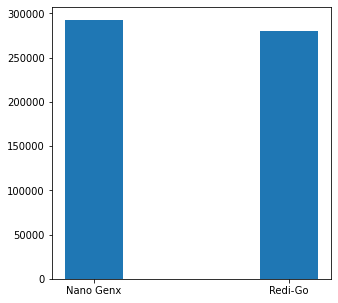

<Figure size 72x72 with 0 Axes>

In [3458]:
page= widgets.HBox([vbox_text])

page2= widgets.HBox([vbox_text2])

page1 = widgets.VBox([vbox_text3])

accordion = widgets.Accordion(children=[page, page2, page1])
accordion